In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
mode = "random"  # can be 'random' or 'id'
image_id = "CA214331L0344"
fid_marks = [1,2,3,4]

In [3]:
import src.base.connect_to_database as ctd
import src.load.load_image as li

# create connection to database
conn = ctd.establish_connection()

# if random mode, get a random image id
if mode == "random":
    sql_string = "SELECT image_id FROM images_fid_points " \
                 "WHERE subset_n_x IS NOT NULL OR subset_e_x IS NOT NULL OR " \
                 "subset_s_x IS NOT NULL OR subset_w_x IS NOT NULL " \
                 "ORDER BY RANDOM() LIMIT 1"
    image_id = ctd.execute_sql(sql_string, conn)['image_id'].iloc[0]

# get subset information from data
sql_string = f"SELECT * FROM images_fid_points WHERE image_id='{image_id}'"
data = ctd.execute_sql(sql_string, conn)

# load image
image = li.load_image(image_id)

In [4]:
# Position of fid marks:
# 3 7 2
# 5   6
# 1 8 4

[(5080, 51, 5330, 301), (9674, 4625, 9924, 4875), (5050, 9183, 5300, 9433), (524, 4651, 774, 4901)]


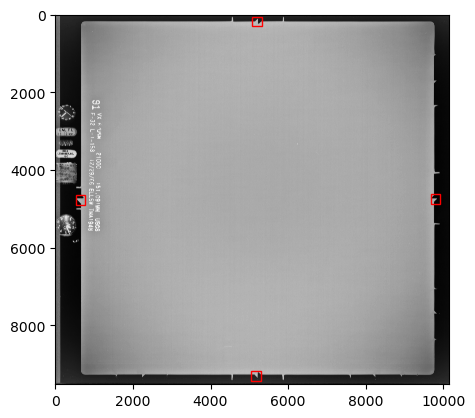

In [5]:
import src.display.display_images as di

# Initialize an empty list to hold bounding boxes
bounding_boxes = []

subset_width = data['subset_width'].iloc[0]
subset_height = data['subset_height'].iloc[0]

# Loop over the range of subsets to extract bounding box information
for key in ["n", "e", "s", "w"]:
    x_col = data[f'subset_{key}_x'].iloc[0]
    y_col = data[f'subset_{key}_y'].iloc[0]

    if x_col is None or y_col is None:
        continue

    bounding_box = (int(x_col), int(y_col),
                    int(x_col + subset_width), int(y_col + subset_height))
    bounding_boxes.append(bounding_box)

print(bounding_boxes)

di.display_images(image, bounding_boxes=[bounding_boxes])

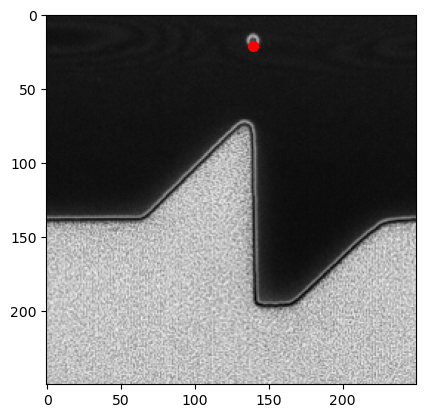

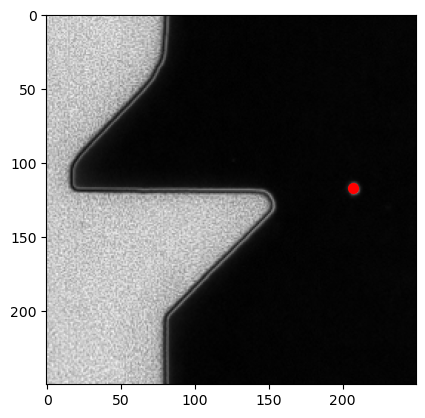

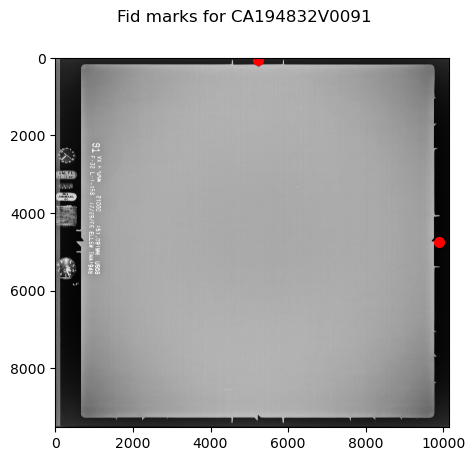

In [9]:
import src.fid_marks.extract_fid_mark as efm

fid_marks = []
for key in ["n", "e", "s", "w"]:

    # get the bounding box of the subset
    x_col = data[f'subset_{key}_x'].iloc[0]
    y_col = data[f'subset_{key}_y'].iloc[0]

    if x_col is None or y_col is None:
        continue

    bounding_box = (int(x_col), int(y_col),
                    int(x_col + subset_width), int(y_col + subset_height))

    fid_mark = efm.extract_fid_mark(image, key, bounding_box, display=True)
    if fid_mark is not None:
        fid_marks.append(fid_mark)

style_config={"title": f"Fid marks for {image_id}"}
di.display_images(image, points=[fid_marks], style_config=style_config)